In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pystan

In [18]:
# stan function for the first example

model = '''
    functions {
          real u_lpdf (real theta) {return 2*theta^2 - theta^4;} # self defined function
    }
    data {
    }
    parameters {
        real theta;
    }
    model {
        theta ~ u_lpdf();
    }
    
    '''

# no data needed for this exmaple
data = {}
sm = pystan.StanModel(model_code=model)
fit = sm.sampling(data=data, iter=3000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a211406f45dd6139212097030b6461f7 NOW.


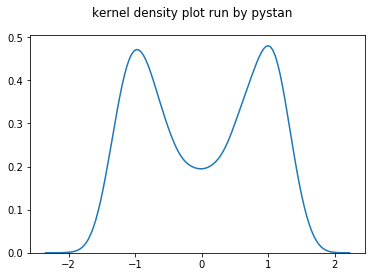

In [21]:
kdeplt1 = sns.kdeplot(fit["theta"])
plt.suptitle("kernel density plot run by pystan")
fig1 = kdeplt1.get_figure()
fig1.savefig("example1_pystan.png")

Pystan for example2

In [28]:
# stan function for second mix normal example

np.random.seed(5000)

model2 = '''
    data {
      int N;
      vector[N] y; # observation
      int groups; # number of mixture models
      vector<lower = 0>[groups] sigma; # known sigma
      vector<lower = 0>[groups]  weights; # known weights
    }
    parameters {
      vector[groups] mu; # variable to be sampled
    }
    model {
      vector[groups] contributions;
      mu ~ normal(0, 10); # prior for mu
      
      # log_sum_exp for models
      for(i in 1:N) {
        for(k in 1:groups) {
          contributions[k] = log(weights[k]) + normal_lpdf(y[i] | mu[k], sigma[k]); 
        }
        target += log_sum_exp(contributions);
      }
    }
    '''
    
# Set up the data
p = 2 # dimension of mu and sigma
mu = np.array([-3, 3]).reshape(2,1) # true value for mu
n = 200 # number of observations
y = np.array([np.random.normal(mu[0], 1, n),np.random.normal(mu[1], 1, n)]).flatten() # observations
sigma = np.array([1,1]) # known sigma
weights = np.array([0.5,0.5]) # coefficient before distribution

data2={'N':len(y),
    'y':y,
    'groups':p,
    'sigma':sigma,
    'weights':weights}

    
sm2 = pystan.StanModel(model_code=model2)
fit2 = sm2.sampling(data=data2, iter=3000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3579c27355910cad230385e83494cc80 NOW.


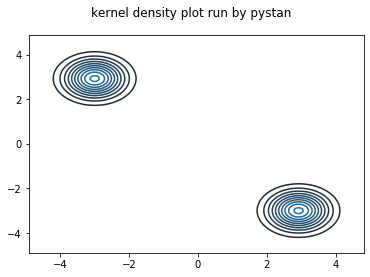

In [30]:
kdeplt2 = sns.kdeplot(fit2["mu"])
plt.suptitle("kernel density plot run by pystan")
fig2 = kdeplt2.get_figure()
fig2.savefig('example2_pystan.png')